Создание ссылок

In [ ]:
ln -s /usr/share/data-minor-bioinf/assembly/oil_R1.fastq
ln -s /usr/share/data-minor-bioinf/assembly/oil_R2.fastq
ln -s /usr/share/data-minor-bioinf/assembly/oilMP_S4_L001_R1_001.fastq
ln -s /usr/share/data-minor-bioinf/assembly/oilMP_S4_L001_R2_001.fastq

С помощью команды seqtk выбраны случайно 5 миллионов чтений типа paired-end

In [ ]:
seqtk sample -s126 oil_R1.fastq 5000000 > paired_end_R1.fastq
seqtk sample -s126 oil_R2.fastq 5000000 > paired_end_R2.fastq

С помощью команды seqtk выбраны 1.5 миллиона чтений типа mate-pairs 

In [ ]:
seqtk sample -s126 oilMP_S4_L001_R1_001.fastq 1500000 > mate_pairs_R1.fastq
seqtk sample -s126 oilMP_S4_L001_R2_001.fastq 1500000 > mate_pairs_R2.fastq

Применение программы FastQC для оценки качества исходных чтений

In [ ]:
mkdir fastqc
ls paired_end_R* mate_pairs_R* | xargs -P 4 -tI{} fastqc -o fastqc {}

Создание отчета через MultiQC

In [ ]:
mkdir multiqc
multiqc -o multiqc fastqc

С помощью программ platanus_trim и platanus_internal_trim подрезаны чтения по качеству и удалены адаптеры


In [ ]:
platanus_trim sub*
platanus_internal_trim matep*

Оценка качества обрезанных чтений с помощью FastQC

In [ ]:
mkdir fastqc_trimmed
ls paired_end_R* mate_pairs_R*| xargs -P 4 -tI{} fastqc -o fastqc_trimmed {}

Создание отчета для обрезанных чтений через MultiQC

In [ ]:
mkdir multiqc_trimmed
multiqc -o multiqc_trimmed fastqc_trimmed

Сбор контиг с помощью программы “platanus assemble”

In [ ]:
time platanus assemble -o Poil -f paired_end_R1.fastq.trimmed paired_end_R2.fastq.trimmed 2> assemble.log

Сбор скаффолдов с помощью “platanus scaffold”

In [ ]:
time platanus scaffold -o Poil -c Poil_contig.fa -IP1 paired_end_R1.fastq.trimmed paired_end_R2.fastq.trimmed -OP2 mate_pairs_R1.fastq.int_trimmed mate_pairs_R2.fastq.int_trimmed 2> scaffold.log

Уменьшение кол-ва гэпов с помощью подрезанных чтений, используя программу “platanus gap_close” 


In [ ]:
time platanus gap_close -o Poil -c Poil_scaffold.fa -IP1 paired_end_R1.fastq.trimmed paired_end_R2.fastq.trimmed -OP2 mate_pairs_R1.fastq.int_trimmed mate_pairs_R2.fastq.int_trimmed 2> gapclose.log

**Статистика, полученная с помощью MultiQC, для исходных чтений**

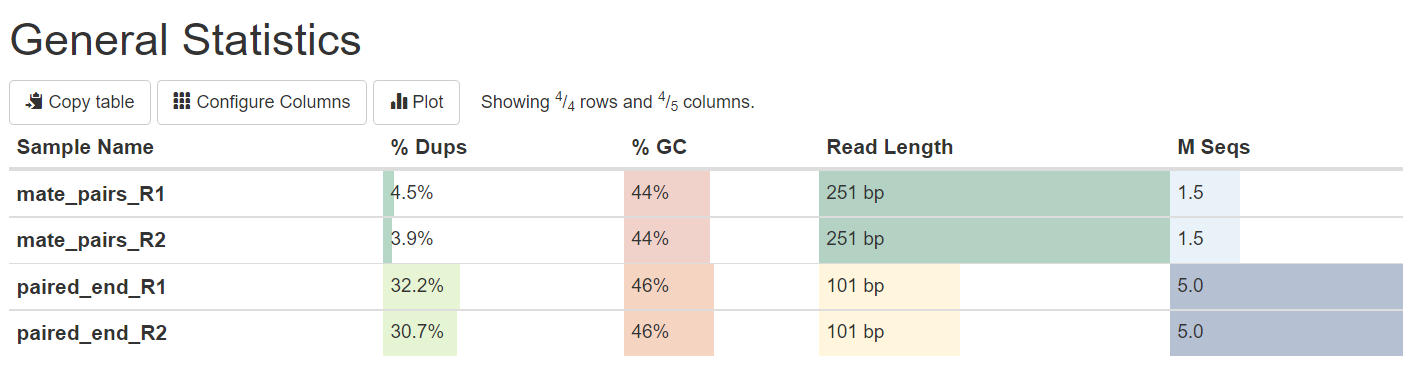

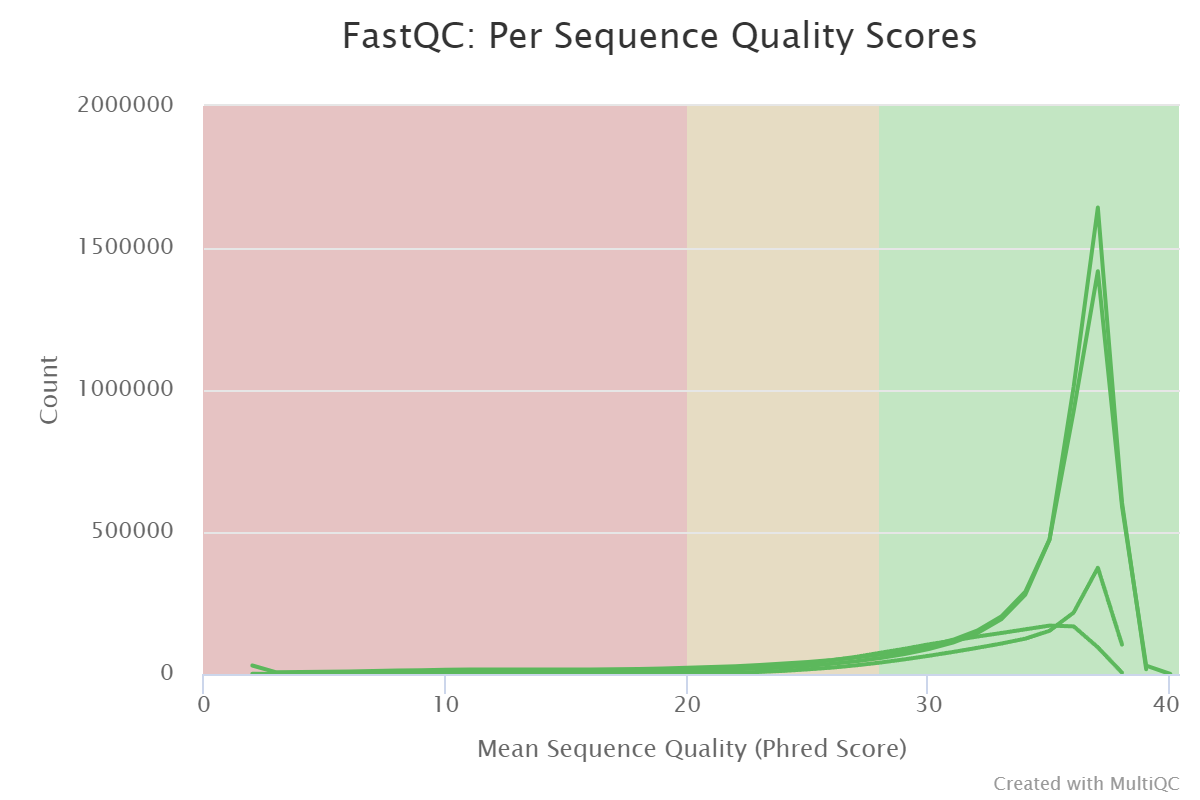

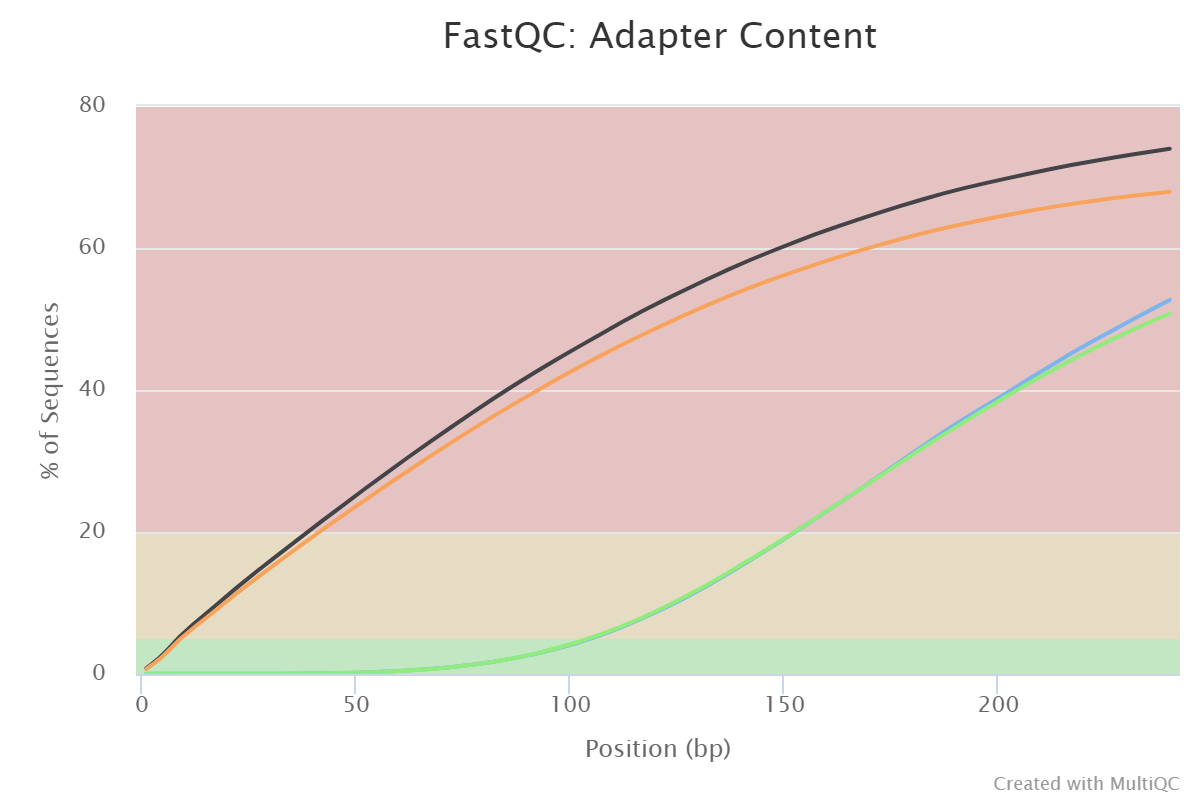

**Статистика, полученная с помощью MultiQC, для подрезанных чтений**



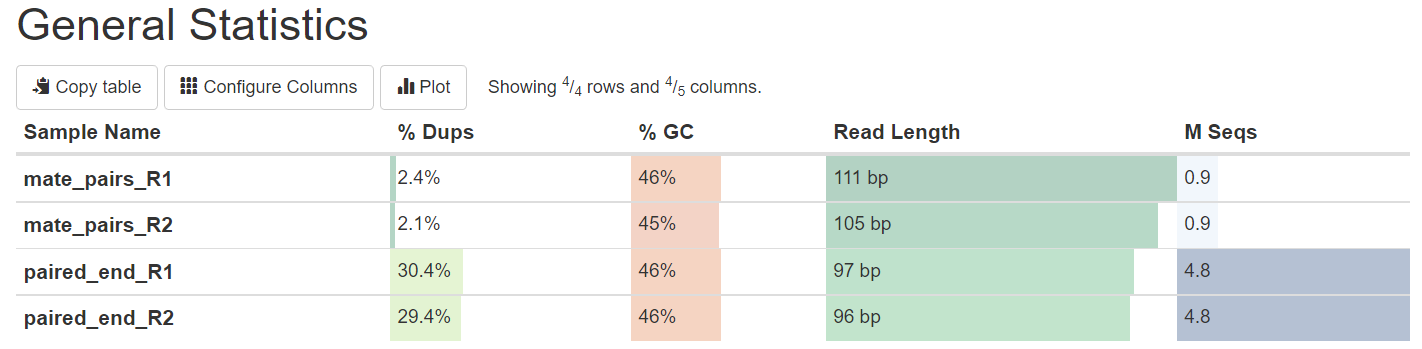

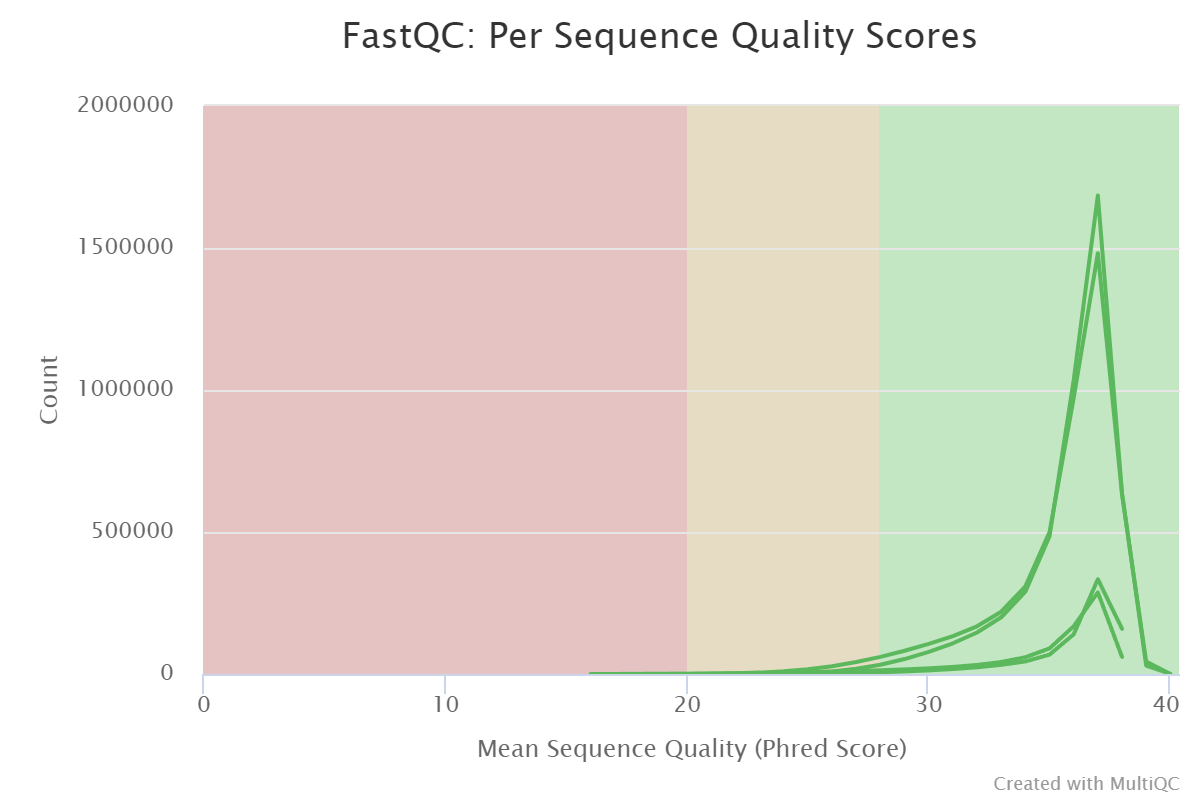

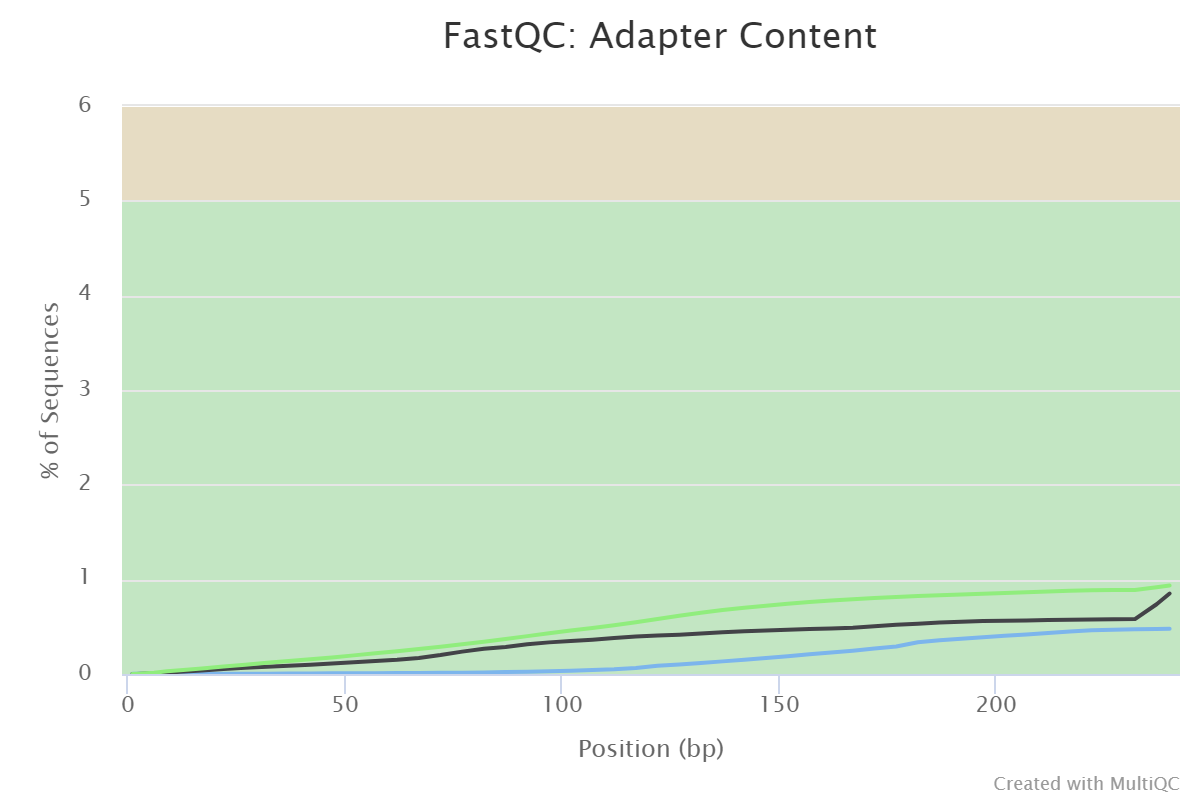